# Character Shifts in Harry Potter Fanfics

# Emotional Profiles

### Last updated: 19.01.2022

## 0. Preliminaries

### 0.1 Import/Load

Import Modules:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import numpy as np
import math
import pickle
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
path_data = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\data'
path_models = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\vector_models'
path_pickled = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\pickled'
path_cooccurrences = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\cooccurrences'
path_sentiment = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\sentiment_profiles'

Load KeyesVectors Harry Potter books/fanfiction:

In [3]:
model_books = KeyedVectors.load(path_models + '\\modelHPoriginalsD_vectors.kv')

In [4]:
model_ff = KeyedVectors.load(path_models + '\\modelHPFFsD_vectors.kv')

### 0.2 Get Characters

Get Top 100 most frequent characters from books:

In [5]:
df = pd.read_csv(path_cooccurrences + '\\freq_names_originals.csv', delimiter=';')
top_chars_books = list(df["character_name"][:100])
print(top_chars_books)

['HARRY_POTTER', 'RON_WEALSEY', 'HERMINE_GRANGER', 'ALBUS_DUMBLEDORE', 'RUBEUS_HAGRID', 'SEVERUS_SNAPE', 'VOLDEMORT', 'DRACO_MALFOY', 'SIRIUS_BLACK', 'FRED_WEASLEY', 'REMUS_LUPIN', 'NEVILLE_LONGBOTTOM', 'GINNY_WEASLEY', 'GEORGE_WEASLEY', 'MINERVA_MCGONAGALL', 'ARTHUR_WEASLEY', 'DOLORES_UMBRIDGE', 'ALASTOR_MOODY', 'VERNON_DURSLEY', 'CORNELIUS_FUDGE', 'DOBBY', 'DUDLEY_DURSLEY', 'HORACE_SLUGHORN', 'PERCY_WEASLEY', 'CEDRIC_DIGGORY', 'LUNA_LOVEGOOD', 'PETER_PETTIGREW', 'PETUNIA_DURSLEY', 'BILL_WEASLEY', 'ARGUS_FILCH', 'VIKTOR_KRUM', 'FLEUR_DELACOUR', 'GILDEROY_LOCKHART', 'SYBILL_TRELAWNEY', 'ANDROMEDA_TONKS', 'LUDO_BAGMAN', 'GREGORY_GOYLE', 'VINCENT_CRABBE', 'CHO_CHANG', 'BELLATRIX_LESTRANGE', 'DEAN_THOMAS', 'HEDWIG', 'OLIVER_WOOD', 'JAMES_POTTER', 'SEAMUS_FINNIGAN', 'RITA_KIMMKORN', 'BARTEMIUS_CROUCH_JR', 'PEEVES', 'IGOR_KARKAROFF', 'POPPY_POMFREY', 'KRUMMBEIN', 'WINKY', 'RUFUS_SCRIMGEOUR', 'MUNDUNGUS_FLETCHER', 'LUCIUS_MALFOY', 'LAVENDER_BROWN', 'FILIUS_FLITWICK', 'GRIPHOOK', 'KRAETZE', '

Get Top 100 most frequent characters from fanfiction:

In [6]:
df = pd.read_csv(path_cooccurrences + '\\freq_names_ffs.csv', delimiter=';')
top_chars_ff = list(df["character_name"][:100])
print(top_chars_ff)

['HARRY_POTTER', 'DRACO_MALFOY', 'HERMINE_GRANGER', 'SEVERUS_SNAPE', 'RON_WEALSEY', 'ALBUS_DUMBLEDORE', 'SIRIUS_BLACK', 'JAMES_POTTER', 'VOLDEMORT', 'GINNY_WEASLEY', 'LILY_POTTER', 'REMUS_LUPIN', 'LUCIUS_MALFOY', 'BLAISE_ZABINI', 'MINERVA_MCGONAGALL', 'FRED_WEASLEY', 'GEORGE_WEASLEY', 'NEVILLE_LONGBOTTOM', 'ANDROMEDA_TONKS', 'NARZISSA_MALFOY', 'PANSY_PARKINSON', 'BELLATRIX_LESTRANGE', 'LUNA_LOVEGOOD', 'DAPHNE_GREENGRAS', 'SCORPIUS_MALFOY', 'RUBEUS_HAGRID', 'PETER_PETTIGREW', 'CHARLIE_WEASLY', 'MOLLY_WEASLEY', 'THEODOR_NOTT', 'POPPY_POMFREY', 'KINGSLEY_SHACKLEBOLT', 'DEAN_THOMAS', 'BILL_WEASLEY', 'PERCY_WEASLEY', 'DOLORES_UMBRIDGE', 'ALICE_LONGBOTTOM', 'FENRIR_GREYBACK', 'GELLERT_GRINDELWALD', 'ROSE_GRANGER_WEASLEY', 'ARTHUR_WEASLEY', 'MARY_MACDONALD', 'REGULUS_BLACK', 'HORACE_SLUGHORN', 'LAVENDER_BROWN', 'PETUNIA_DURSLEY', 'SEAMUS_FINNIGAN', 'CEDRIC_DIGGORY', 'DUDLEY_DURSLEY', 'ALASTOR_MOODY', 'EDWARD_LUPIN', 'FLEUR_DELACOUR', 'OLIVER_WOOD', 'GRAHAM_MONTAGUE', 'DOBBY', 'HANNAH_ABBOTT',

Check if all characters are contained in word embeddings:

In [7]:
for char in top_chars_books:
    if char not in model_books.index_to_key:
        print("Error: Term \'" + char + "\' not in books embedding")

for char in top_chars_ff:
    if char not in model_ff.index_to_key:
        print("Error: Term \'" + char + "\' not in fanfiction embedding")

Create new list and replace missing terms with alternative term:

## 0.3 Functions

Define low/high valence and low/high arousal centroids

In [8]:
# Originals
with open(path_pickled + '\\high_val_originals.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_books = np.average([model_books.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_originals.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_books = np.average([model_books.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_originals.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_books = np.average([model_books.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_originals.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_books = np.average([model_books.get_vector(word) for word in low_arousal_cluster], axis=0)

# Fanfiction
with open(path_pickled + '\\high_val_ffs.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_ff = np.average([model_ff.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_ffs.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_ff = np.average([model_ff.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_ffs.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_ff = np.average([model_ff.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_ffs.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_ff = np.average([model_ff.get_vector(word) for word in low_arousal_cluster], axis=0)

Define emotional distance function

In [9]:
def emo_distance(word, model, aspect = "valence", centroid_choice = "fanfiction"):
    if centroid_choice == "books":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_books,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_books,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_books,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_books,model.get_vector(word)], dense_output=False)[0,1]
        
    if centroid_choice == "fanfiction":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_ff,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_ff,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_ff,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_ff,model.get_vector(word)], dense_output=False)[0,1]
    
    return (high - low)

Define emotional potential function:

In [10]:
def emotional_potential(valence, arousal):
    return abs(valence) * arousal

# 1. Emotional Profiles

### 1.1 Emotional Profiles for Books

Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:

In [11]:
profile_dict_books = {}
valence_list = []
arousal_list = []
potential_list = []

for char in top_chars_books:
    try:
        valence = emo_distance(char, model_books, "valence", "books")
        valence_list.append(valence)
        arousal = emo_distance(char, model_books, "arousal", "books")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_books[char] = (valence, arousal, potential)
    except:
        continue

Min/Max values of valence/arousal/emotional potential:

In [12]:
min_valence_books = min(valence_list)
max_valence_books = max(valence_list)
min_arousal_books = min(arousal_list)
max_arousal_books = max(arousal_list)
min_potential_books = min(potential_list)
max_potential_books = max(potential_list)

print("Minimal Valence: " + str(min_valence_books))
print("Maximal Valence: " + str(max_valence_books))
print("Minimal Arousal: " + str(min_arousal_books))
print("Maximal Arousal: " + str(max_arousal_books))
print("Minimal Potential: " + str(min_potential_books))
print("Maximal Potential: " + str(max_potential_books))

Minimal Valence: -0.25816163
Maximal Valence: 0.23954871
Minimal Arousal: -0.23198718
Maximal Arousal: 0.17198893
Minimal Potential: -0.0323933
Maximal Potential: 0.025621355


Top 10 most frequent characters to observe:

In [13]:
#chars = top_chars_books[:10]
chars = ["DOBBY", "ALBUS_DUMBLEDORE", "HARRY_POTTER", "RUBEUS_HAGRID", "HERMINE_GRANGER", "SEVERUS_SNAPE", "VOLDEMORT"]
print(chars)

['DOBBY', 'ALBUS_DUMBLEDORE', 'HARRY_POTTER', 'RUBEUS_HAGRID', 'HERMINE_GRANGER', 'SEVERUS_SNAPE', 'VOLDEMORT']


Lists containing percentile of chosen characters for valence/arousal/emotional potential:

In [14]:
valence_list = []
arousal_list = []
potential_list = []
for char in chars:
    valence_list.append(float(profile_dict_books[char][0] - min_valence_books) / (max_valence_books - min_valence_books))
    arousal_list.append(float(profile_dict_books[char][1] - min_arousal_books) / (max_arousal_books - min_arousal_books))
    potential_list.append(float(profile_dict_books[char][2] - min_potential_books) / (max_potential_books - min_potential_books))

Grouped bar plot for valence/arousal/emotional potential:

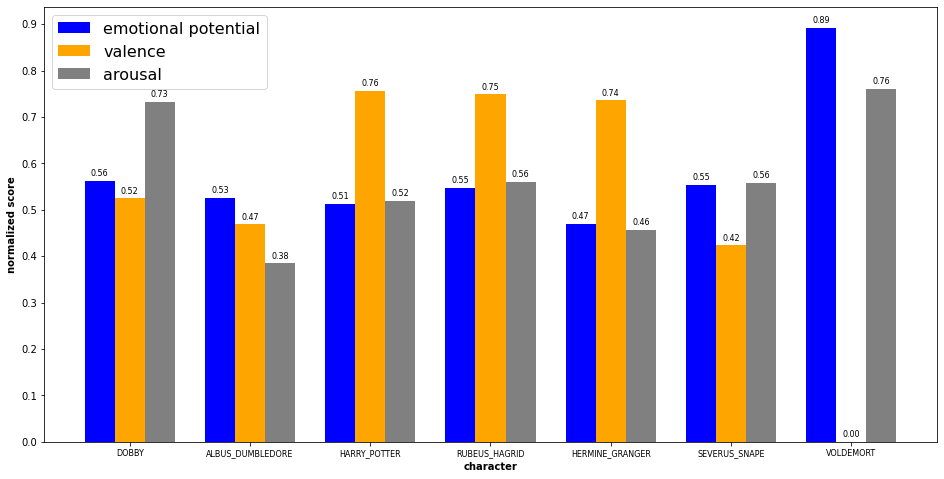

In [15]:
x = np.arange(len(chars))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('character', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(chars))], chars, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\jacobs_barplot_originals.png', dpi=300, bbox_inches = 'tight')

### 1.2 Emotional Profiles for Fanfiction

Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:

In [16]:
profile_dict_ff = {}
valence_list = []
arousal_list = []
potential_list = []

for char in top_chars_ff:
    try:
        valence = emo_distance(char, model_ff, "valence", "fanfiction")
        valence_list.append(valence)
        arousal = emo_distance(char, model_ff, "arousal", "fanfiction")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_ff[char] = (valence, arousal, potential)
    except:
        continue

Min/Max values of valence/arousal/emotional potential:

In [17]:
min_valence_ff = min(valence_list)
max_valence_ff = max(valence_list)
min_arousal_ff = min(arousal_list)
max_arousal_ff = max(arousal_list)
min_potential_ff = min(potential_list)
max_potential_ff = max(potential_list)

print("Minimal Valence: " + str(min_valence_ff))
print("Maximal Valence: " + str(max_valence_ff))
print("Minimal Arousal: " + str(min_arousal_ff))
print("Maximal Arousal: " + str(max_arousal_ff))
print("Minimal Potential: " + str(min_potential_ff))
print("Maximal Potential: " + str(max_potential_ff))

Minimal Valence: -0.3044753
Maximal Valence: 0.18110065
Minimal Arousal: -0.17665818
Maximal Arousal: 0.2851528
Minimal Potential: -0.023231264
Maximal Potential: 0.07646322


Top 10 most frequent characters to observe:

In [18]:
#chars = top_chars_ff[:10]
chars = ["DOBBY", "ALBUS_DUMBLEDORE", "HARRY_POTTER", "RUBEUS_HAGRID", "HERMINE_GRANGER", "SEVERUS_SNAPE", "VOLDEMORT"]
print(chars)

['DOBBY', 'ALBUS_DUMBLEDORE', 'HARRY_POTTER', 'RUBEUS_HAGRID', 'HERMINE_GRANGER', 'SEVERUS_SNAPE', 'VOLDEMORT']


Lists containing percentile of chosen characters for valence/arousal/emotional potential:

In [19]:
valence_list = []
arousal_list = []
potential_list = []
for char in chars:
    valence_list.append(float(profile_dict_ff[char][0] - min_valence_ff) / (max_valence_ff - min_valence_ff))
    arousal_list.append(float(profile_dict_ff[char][1] - min_arousal_ff) / (max_arousal_ff - min_arousal_ff))
    potential_list.append(float(profile_dict_ff[char][2] - min_potential_ff) / (max_potential_ff - min_potential_ff))

Grouped bar plot for valence/arousal/emotional potential:

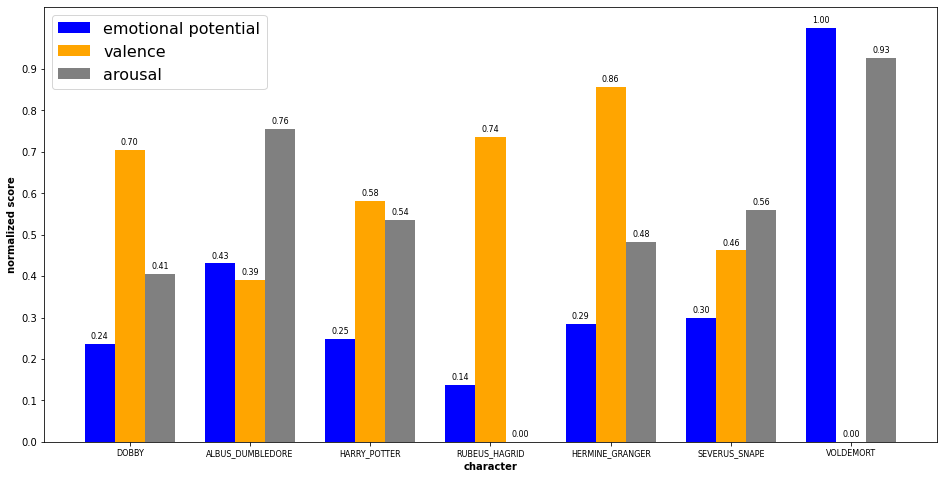

In [20]:
x = np.arange(len(chars))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('character', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(chars))], chars, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\jacobs_barplot_ffs.png', dpi=300, bbox_inches = 'tight')

## 2 Compare characters

### 2.1 Scatterplot across models 

Normalize data on [-1,1]

In [21]:
shift_dict = {}

for char in set(profile_dict_books.keys()).intersection(set(profile_dict_ff.keys())):
    shift_dict[char] = (2 * float(profile_dict_books[char][0] - min_valence_books) / (max_valence_books - min_valence_books) - 1, 
                        2 * float(profile_dict_books[char][1] - min_arousal_books) / (max_arousal_books - min_arousal_books) - 1,
                        2 * float(profile_dict_ff[char][0] - min_valence_ff) / (max_valence_ff - min_valence_ff) - 1,
                        2 * float(profile_dict_ff[char][1] - min_arousal_ff) / (max_arousal_ff - min_arousal_ff) - 1)


Scatter plot for all characters that are in both models

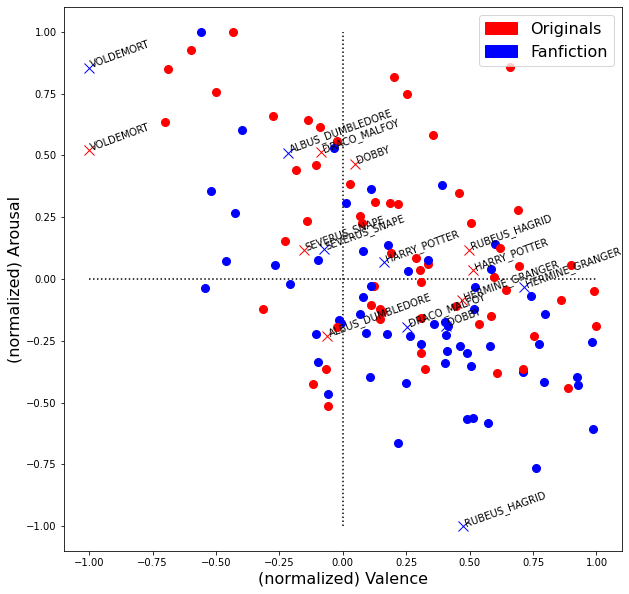

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

marked_chars = ["DOBBY", "ALBUS_DUMBLEDORE", "HARRY_POTTER", "RUBEUS_HAGRID", "HERMINE_GRANGER", "SEVERUS_SNAPE", "VOLDEMORT", "DRACO_MALFOY"]

plt.xlabel('(normalized) Valence', fontsize=16)
plt.ylabel('(normalized) Arousal', fontsize=16)
plt.vlines(0,colors='k',ymin=-1,ymax=1, linestyles='dotted')
plt.hlines(0,colors='k',xmin=-1,xmax=1, linestyles='dotted')

red_patch = mpatches.Patch(color='r', label='Originals')
blue_patch = mpatches.Patch(color='b', label="Fanfiction")
plt.legend(handles=[red_patch,blue_patch], prop={'size': 16})

for char in shift_dict.keys():   
    if char in marked_chars:
        plt.plot(shift_dict[char][0], shift_dict[char][1], 'x', color="r", markersize=10)
        plt.annotate(char, xy=(shift_dict[char][0], shift_dict[char][1]), fontsize=10, rotation=20)
        plt.plot(shift_dict[char][2], shift_dict[char][3], 'x', color="b", markersize=10)
        plt.annotate(char, xy=(shift_dict[char][2], shift_dict[char][3]), fontsize=10, rotation=20)
        continue
    plt.plot(shift_dict[char][0], shift_dict[char][1], 'o', color="r", markersize=8)
    plt.plot(shift_dict[char][2], shift_dict[char][3], 'o', color="b", markersize=8)
    
fig.savefig(path_sentiment + '\\scatterplot_shifts.png', dpi=300, bbox_inches = 'tight')

Plot N biggest shifts across models

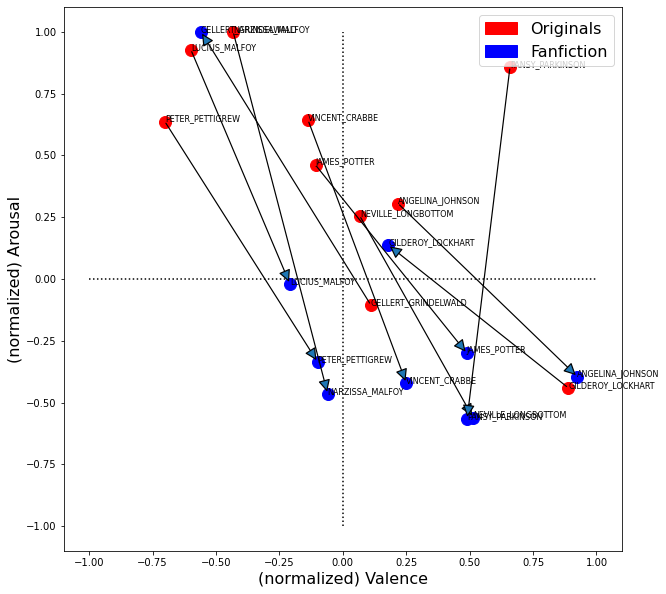

In [23]:
top_n = 10

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.xlabel('(normalized) Valence', fontsize=16)
plt.ylabel('(normalized) Arousal', fontsize=16)
plt.vlines(0,colors='k',ymin=-1,ymax=1, linestyles='dotted')
plt.hlines(0,colors='k',xmin=-1,xmax=1, linestyles='dotted')
red_patch = mpatches.Patch(color='r', label='Originals')
blue_patch = mpatches.Patch(color='b', label="Fanfiction")
plt.legend(handles=[red_patch,blue_patch], prop={'size': 16})

euclid_dist = []
for char in shift_dict.keys():
    euclid_dist.append((math.dist([shift_dict[char][0] - shift_dict[char][1]],[shift_dict[char][2] - shift_dict[char][3]]),char))
    top_shifts = sorted(euclid_dist, key=lambda t: t[0], reverse=True)[:top_n]
    
for _, char in top_shifts:    
    plt.plot(shift_dict[char][0], shift_dict[char][1], 'o', color="r", markersize=12)
    plt.annotate(char, xy=(shift_dict[char][0], shift_dict[char][1]), fontsize=8)
    plt.plot(shift_dict[char][2], shift_dict[char][3], 'o', color="b", markersize=12)
    plt.annotate(char, xy=(shift_dict[char][2], shift_dict[char][3]), fontsize=8)
    plt.annotate(text='', xy=(shift_dict[char][0], shift_dict[char][1]), xytext=(shift_dict[char][2], shift_dict[char][3]), arrowprops=dict(arrowstyle='<|-', mutation_scale=25, linewidth=1.2))
    
fig.savefig(path_sentiment + '\\scatterplot_biggest_shifts.png', dpi=300, bbox_inches = 'tight')

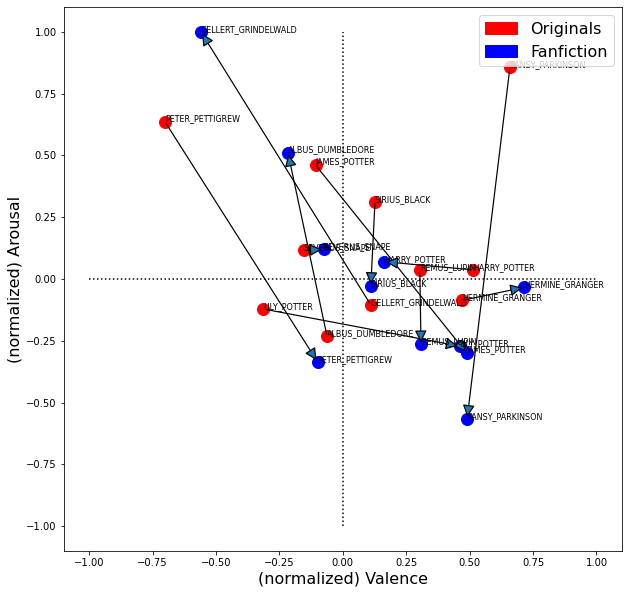

In [24]:
top_n = 11
shifts = ["PANSY_PARKINSON", "HARRY_POTTER", "HERMINE_GRANGER", "SEVERUS_SNAPE", "ALBUS_DUMBLEDORE",
          "GELLERT_GRINDELWALD", "JAMES_POTTER", "SIRIUS_BLACK", "REMUS_LUPIN", 
          "PETER_PETTIGREW", "LILY_POTTER"]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.xlabel('(normalized) Valence', fontsize=16)
plt.ylabel('(normalized) Arousal', fontsize=16)
plt.vlines(0,colors='k',ymin=-1,ymax=1, linestyles='dotted')
plt.hlines(0,colors='k',xmin=-1,xmax=1, linestyles='dotted')
red_patch = mpatches.Patch(color='r', label='Originals')
blue_patch = mpatches.Patch(color='b', label="Fanfiction")
plt.legend(handles=[red_patch,blue_patch], prop={'size': 16})

euclid_dist = []
for char in shift_dict.keys(): 
    if char in shifts:
        euclid_dist.append((math.dist([shift_dict[char][0] - shift_dict[char][1]],[shift_dict[char][2] - shift_dict[char][3]]),char))
        top_shifts = sorted(euclid_dist, key=lambda t: t[0], reverse=True)[:top_n]
    
for _, char in top_shifts:    
    plt.plot(shift_dict[char][0], shift_dict[char][1], 'o', color="r", markersize=12)
    plt.annotate(char, xy=(shift_dict[char][0], shift_dict[char][1]), fontsize=8)
    plt.plot(shift_dict[char][2], shift_dict[char][3], 'o', color="b", markersize=12)
    plt.annotate(char, xy=(shift_dict[char][2], shift_dict[char][3]), fontsize=8)
    plt.annotate(text='', xy=(shift_dict[char][0], shift_dict[char][1]), xytext=(shift_dict[char][2], shift_dict[char][3]), arrowprops=dict(arrowstyle='<|-', mutation_scale=25, linewidth=1.2))
    
fig.savefig(path_sentiment + '\\scatterplot_shifts_selection.png', dpi=300, bbox_inches = 'tight')

Calculate sum of shifts

In [25]:
main_characters = ["DRACO_MALFOY", "ALBUS_DUMBLEDORE", "HARRY_POTTER", "RUBEUS_HAGRID", "HERMINE_GRANGER", "SEVERUS_SNAPE", "VOLDEMORT", "RON_WEASLEY"]


sum_valence_main = 0
sum_valence_side = 0
sum_arousal_main = 0
sum_arousal_side = 0
sum_shiftlen_main = 0
sum_shiftlen_side = 0

for char in shift_dict.keys():
    shift = shift_dict[char]
    if char in main_characters:
        sum_valence_main += shift[2] - shift[0] 
        sum_arousal_main += shift[3] - shift[1]
        sum_shiftlen_main += math.sqrt((shift[2] - shift[0])**2 + (shift[3] - shift[1])**2)
    else:
        sum_valence_side += shift[2] - shift[0] 
        sum_arousal_side += shift[3] - shift[1]
        sum_shiftlen_side += math.sqrt((shift[2] - shift[0])**2 + (shift[3] - shift[1])**2)
    
sum_valence = sum_valence_main + sum_valence_side
sum_arousal = sum_arousal_main + sum_arousal_side
sum_shiftlen = sum_shiftlen_main + sum_shiftlen_side

num_main = len(main_characters)
num_side = len(shift_dict.keys()) - len(main_characters)

print(str(num_main) + " main characters")
print(str(num_side) + " side characters")

print("\n### Valence ###")
print("Sum of valence shifts: " + str(sum_valence))
print("Average valence shift: " + str(sum_valence / len(shift_dict.keys())))
print("Sum of valence shifts for main characters: " + str(sum_valence_main))
print("Average of valence shifts for main character: " + str(sum_valence_main / num_main))
print("Sum of valence shifts for side characters: " + str(sum_valence_side))
print("Average of valence shifts for side character: " + str(sum_valence_side / num_side))

print("\n### Arousal ###")
print("Sum of arousal shifts: " + str(sum_arousal))
print("Average valence shift: " + str(sum_arousal / len(shift_dict.keys())))
print("Sum of arousal shifts for main characters: " + str(sum_arousal_main))
print("Average of arousal shifts for main character: " + str(sum_arousal_main / num_main))
print("Sum of arousal shifts for side characters: " + str(sum_arousal_side))
print("Average of arousal shifts for side character: " + str(sum_arousal_side / num_side))

print("\n### Shift Length ###")
print("Total shift lengths: " + str(sum_shiftlen))
print("Average shift lengths: " + str(sum_shiftlen / len(shift_dict.keys())))
print("Total shift lengths for main characters: " + str(sum_shiftlen_main))
print("Average shift lengths for main characters: " + str(sum_shiftlen_main / num_main))
print("Total shift lengths for side characters: " + str(sum_shiftlen_side))
print("Average shift length for side characters: " + str(sum_shiftlen_side / num_side))


8 main characters
59 side characters

### Valence ###
Sum of valence shifts: 3.339124262570116
Average valence shift: 0.049837675560747995
Sum of valence shifts for main characters: 0.13209378536624716
Average of valence shifts for main character: 0.016511723170780895
Sum of valence shifts for side characters: 3.207030477203869
Average of valence shifts for side character: 0.05435644876616727

### Arousal ###
Sum of arousal shifts: -17.923243064637493
Average valence shift: -0.2675110905169775
Sum of arousal shifts for main characters: -0.658501801729003
Average of arousal shifts for main character: -0.08231272521612537
Sum of arousal shifts for side characters: -17.26474126290849
Average of arousal shifts for side character: -0.29262273326963545

### Shift Length ###
Total shift lengths: 37.915363976209164
Average shift lengths: 0.5659009548687935
Total shift lengths for main characters: 3.6716875162324114
Average shift lengths for main characters: 0.4589609395290514
Total shift lengt

### 2.2 Radar plots

#### 2.2.1 Normalize data

Create dictionary of characters with normalized values for book model

In [26]:
high_valence_list_books = [cosine_similarity([centroid_high_valence_books,model_books.get_vector(char)], dense_output=False)[0,1] for char in top_chars_books if char in model_books.index_to_key]
min_high_valence_books = min(high_valence_list_books)
max_high_valence_books = max(high_valence_list_books)
low_valence_list_books = [cosine_similarity([centroid_low_valence_books,model_books.get_vector(char)], dense_output=False)[0,1] for char in top_chars_books if char in model_books.index_to_key]
min_low_valence_books = min(low_valence_list_books)
max_low_valence_books = max(low_valence_list_books)
high_arousal_list_books = [cosine_similarity([centroid_high_arousal_books,model_books.get_vector(char)], dense_output=False)[0,1] for char in top_chars_books if char in model_books.index_to_key]                                            
min_high_arousal_books = min(high_arousal_list_books)
max_high_arousal_books = max(high_arousal_list_books)
low_arousal_list_books = [cosine_similarity([centroid_low_arousal_books,model_books.get_vector(char)], dense_output=False)[0,1] for char in top_chars_books if char in model_books.index_to_key]                                            
min_low_arousal_books = min(low_arousal_list_books)
max_low_arousal_books = max(low_arousal_list_books)
                                            
radar_dict_books = {}
for char in top_chars_books:
    try:
        radar_dict_books[char] = ((cosine_similarity([centroid_high_valence_books,model_books.get_vector(char)], dense_output=False)[0,1] - min_high_valence_books) / (max_high_valence_books - min_high_valence_books),
                                 (cosine_similarity([centroid_low_valence_books,model_books.get_vector(char)], dense_output=False)[0,1] - min_low_valence_books) / (max_low_valence_books - min_low_valence_books),
                                 (cosine_similarity([centroid_high_arousal_books,model_books.get_vector(char)], dense_output=False)[0,1] - min_high_arousal_books) / (max_high_arousal_books - min_high_arousal_books),
                                 (cosine_similarity([centroid_low_arousal_books,model_books.get_vector(char)], dense_output=False)[0,1] - min_low_arousal_books) / (max_low_arousal_books - min_low_arousal_books),
                                 (cosine_similarity([centroid_high_valence_books,model_books.get_vector(char)], dense_output=False)[0,1] - min_high_valence_books) / (max_high_valence_books - min_high_valence_books)) 
    except:
        continue

Create dictionary of characters with normalized values for fanfiction model

In [27]:
high_valence_list_ff = [cosine_similarity([centroid_high_valence_ff,model_ff.get_vector(char)], dense_output=False)[0,1] for char in top_chars_ff if char in model_ff.index_to_key]
min_high_valence_ff = min(high_valence_list_ff)
max_high_valence_ff = max(high_valence_list_ff)
low_valence_list_ff = [cosine_similarity([centroid_low_valence_ff,model_ff.get_vector(char)], dense_output=False)[0,1] for char in top_chars_ff if char in model_ff.index_to_key]
min_low_valence_ff = min(low_valence_list_ff)
max_low_valence_ff = max(low_valence_list_ff)
high_arousal_list_ff = [cosine_similarity([centroid_high_arousal_ff,model_ff.get_vector(char)], dense_output=False)[0,1] for char in top_chars_ff if char in model_ff.index_to_key]                                            
min_high_arousal_ff = min(high_arousal_list_ff)
max_high_arousal_ff = max(high_arousal_list_ff)
low_arousal_list_ff = [cosine_similarity([centroid_low_arousal_ff,model_ff.get_vector(char)], dense_output=False)[0,1] for char in top_chars_ff if char in model_ff.index_to_key]                                            
min_low_arousal_ff = min(low_arousal_list_ff)
max_low_arousal_ff = max(low_arousal_list_ff)
                                            
radar_dict_ff = {}
for char in top_chars_ff:
    try:
        radar_dict_ff[char] = ((cosine_similarity([centroid_high_valence_ff,model_ff.get_vector(char)], dense_output=False)[0,1] - min_high_valence_ff) / (max_high_valence_ff - min_high_valence_ff),
                              (cosine_similarity([centroid_low_valence_ff,model_ff.get_vector(char)], dense_output=False)[0,1] - min_low_valence_ff) / (max_low_valence_ff - min_low_valence_ff),
                              (cosine_similarity([centroid_high_arousal_ff,model_ff.get_vector(char)], dense_output=False)[0,1] - min_high_arousal_ff) / (max_high_arousal_ff - min_high_arousal_ff),
                              (cosine_similarity([centroid_low_arousal_ff,model_ff.get_vector(char)], dense_output=False)[0,1] - min_low_arousal_ff) / (max_low_arousal_ff - min_low_arousal_ff),
                              (cosine_similarity([centroid_high_valence_ff,model_ff.get_vector(char)], dense_output=False)[0,1] - min_high_valence_ff) / (max_high_valence_ff - min_high_valence_ff),) 
    except:
        continue

### 2.3 Character comparison across models

Character to compare:

In [28]:
character = "VOLDEMORT"

Radar Plot

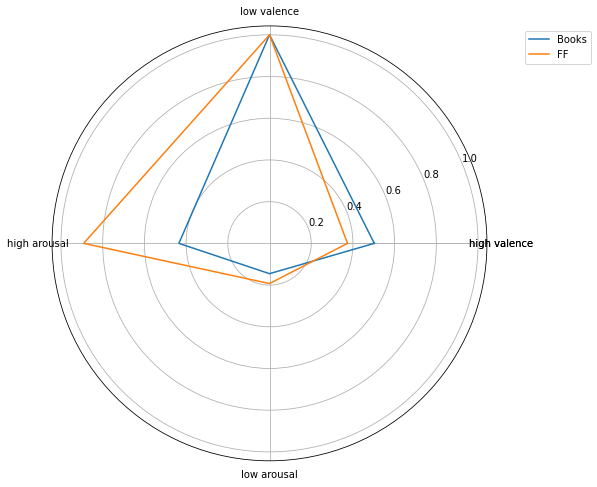

In [30]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
categories = ["high valence", "low valence", "high arousal", "low arousal", "high valence"]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

plt.plot(label_loc, radar_dict_books[character], label="Books")

plt.plot(label_loc, radar_dict_ff[character], label="FF")

plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

fig.savefig(path_sentiment + '\\radarplot_voldemort.png', dpi=300, bbox_inches = 'tight')

### 2.4 Characters comparison in one model

Choose model (comment the other one) and characters

In [31]:
model = "books"
#model = "fanfiction"

characters = ["DOBBY", "ALBUS_DUMBLEDORE", "HARRY_POTTER", "RUBEUS_HAGRID", "HERMINE_GRANGER", "SEVERUS_SNAPE", "VOLDEMORT"]

Radar Plot

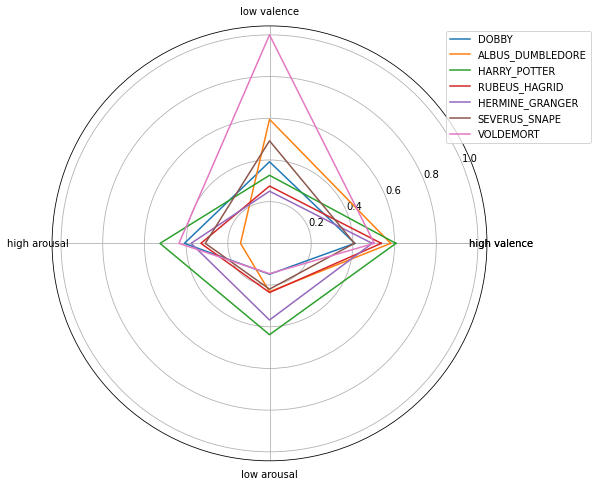

In [32]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
categories = ["high valence", "low valence", "high arousal", "low arousal", "high valence"]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

for character in characters:
    if model == "books":
        plt.plot(label_loc, radar_dict_books[character], label=character)
        
    if model == "fanfiction":
        plt.plot(label_loc, radar_dict_ff[character], label=character)

plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

fig.savefig(path_sentiment + '\\radarplot_main_characters_' + model + '.png', dpi=300, bbox_inches = 'tight')

In [33]:
#model = "books"
model = "fanfiction"

characters = ["DOBBY", "ALBUS_DUMBLEDORE", "HARRY_POTTER", "RUBEUS_HAGRID", "HERMINE_GRANGER", "SEVERUS_SNAPE", "VOLDEMORT"]

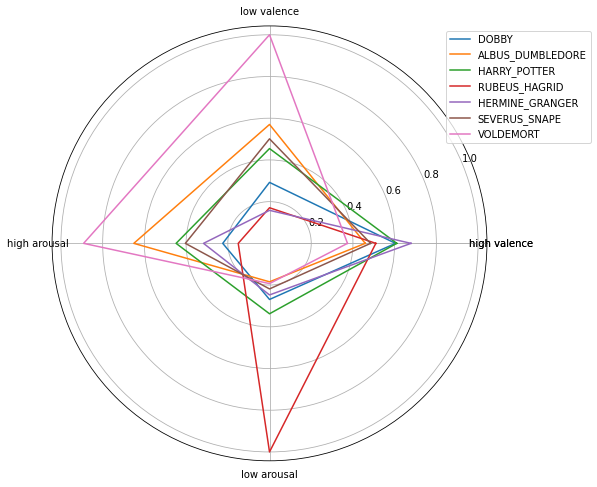

In [34]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
categories = ["high valence", "low valence", "high arousal", "low arousal", "high valence"]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

for character in characters:
    if model == "books":
        plt.plot(label_loc, radar_dict_books[character], label=character)
        
    if model == "fanfiction":
        plt.plot(label_loc, radar_dict_ff[character], label=character)

plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

fig.savefig(path_sentiment + '\\radarplot_main_characters_' + model + '.png', dpi=300, bbox_inches = 'tight')